# Login With Face Recognition

# 1 . Importing Necessary Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 2 . initialize

In [2]:
def FaceDetectorYN(model=False):
    return cv2.FaceDetectorYN.create(model,"",(320, 320),0.9,0.3,5000)

In [3]:
def FaceRecognizerSF(model=False):
    return cv2.FaceRecognizerSF.create(model,"")

In [4]:
def Detect(Detector , imgD , Width , Height):    
    Detector.setInputSize((Width, Height))
    return Detector.detect(imgD)

In [5]:
def Crop(recognizer , image , face):
    return recognizer.alignCrop(image, face[1][0])

In [6]:
def showImage(img , title):
    plt.title(title)
    return plt.imshow(img)

In [7]:
FaceRecognizer = FaceRecognizerSF('face_recognition.onnx')

In [8]:
FaceDetector = FaceDetectorYN('face_detection.onnx')

# 3 . PreProcess

In [9]:
def reSize(img=False):
    _img = cv2.imread(img)
    img1 = _img.copy()
    Width = int(img1.shape[1])
    Height = int(img1.shape[0])
    img1 = cv2.resize(img1, (Width, Height))
    return img1 , Height , Width

## 3.1 Detector [ Sample Image ]

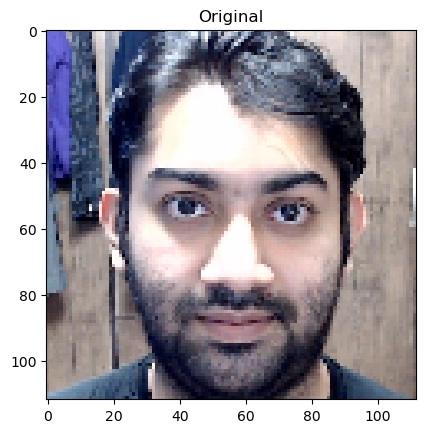

In [10]:
img , imgHeight , imgWidth = reSize("img/new/6.jpg")

Face = Detect(FaceDetector , img , imgWidth , imgHeight)

faceAlign = Crop(FaceRecognizer , img , Face)
faceFeature = FaceRecognizer.feature(faceAlign)

showImage(faceAlign[...,::-1] , 'Original');

# 4 . Webcam Analysis [ Real-Time ]

In [11]:
def Coords(frame , face , thickness):
    coords = face[:-1].astype(np.int32)
    cv2.rectangle(frame, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
    cv2.circle(frame, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
    cv2.circle(frame, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
    cv2.circle(frame, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
    cv2.circle(frame, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
    cv2.circle(frame, (coords[12], coords[13]), 2, (0, 255, 255), thickness)

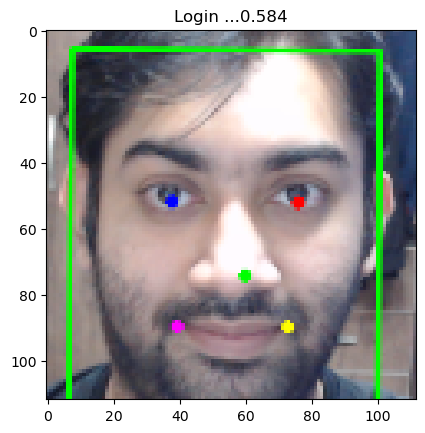

In [13]:
# Initialize Camera
cap = cv2.VideoCapture(0)
width = int(cap.get(3))
height = int(cap.get(4))
FaceDetector.setInputSize((width, height))

# Sensitivity
l2_similarity_threshold = 1.128
counter = 0

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    result = FaceDetector.detect(frame)
    thickness = 2
    
    if result[1] is not None:
        for idx, face in enumerate(result[1]):
            Coords(frame , face , thickness)
            Face2 = Detect(FaceDetector , frame , frame.shape[1], frame.shape[0])
    
            faceAlign2 = Crop(FaceRecognizer , frame , Face2)
            faceFeature2 = FaceRecognizer.feature(faceAlign2)

            L2_score = FaceRecognizer.match(faceFeature, faceFeature2, cv2.FaceRecognizerSF_FR_NORM_L2)

            if L2_score <= l2_similarity_threshold:
                counter += 1

    cv2.imshow('Webcam', frame)
    
    if (counter > 30):
        showImage(faceAlign2[...,::-1] , "Login ..." + str(round(L2_score,3)));
        break
        
    if (cv2.waitKey(1) & 0xFF == 27):
        showImage(faceAlign2[...,::-1] , "Canceled ..." + str(round(L2_score,3)));
        break
        
cap.release()
cv2.destroyAllWindows() 